In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.utils import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

from matplotlib import pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
trainset=pd.read_csv('/kaggle/input/hackathon2021/train.csv/train.csv')
testset=pd.read_csv('/kaggle/input/hackathon2021/test.csv/test.csv')
#extracting 'label' from train.csv i.e.., trainset
trainlabel=trainset['label'].copy()
#deleting 'label' from train.csv i.e.., trainset
trainset.drop(['label'],axis=1,inplace=True)
#converting dataframes of trainset into arrays using numpy
trainset=np.array(trainset)
#reshaping the trainset from(42000,784) to (42000,28,28,1)
trainset=trainset.reshape(42000,28,28,1)
#converting dataframes of testset into arrays using numpy
testset=np.array(testset)
#reshaping testset from (28000,784) to (28000,28,28,1)
testset=testset.reshape(28000,28,28,1)
#normalizing the training and testing sets using an inbuilt method "normalize()" without actually dividing by 255.0
trainset=normalize(trainset,axis=1)
testset=normalize(testset,axis=1)
#print(trainlabel[0])

#building the model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

#compiling and fitting the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(trainset,trainlabel,epochs=5)



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackathon2021/sample_submission.csv
/kaggle/input/hackathon2021/train.csv/train.csv
/kaggle/input/hackathon2021/test.csv/test.csv
Epoch 1/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.4562 - accuracy: 0.8723
Epoch 2/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.1168 - accuracy: 0.9655
Epoch 3/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0719 - accuracy: 0.9777
Epoch 4/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0548 - accuracy: 0.9820
Epoch 5/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0383 - accuracy: 0.9882


DIGIT RECOGNIZED :
4


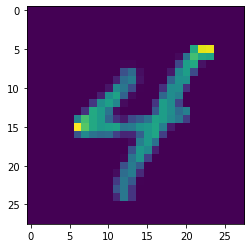

In [2]:
#testing the model with a sample testset input
plt.imshow(testset[1234])
predi=model.predict(testset)
print("DIGIT RECOGNIZED :",end="\n")
print(np.argmax(predi[1234]))

In [3]:
#creating the dataframe for submission file
results=predi.argmax(axis=-1)
result_file=pd.DataFrame()
result_file['ImageID']=list(range(1,len(testset)+1))
result_file['Label']=results
print(result_file)
#converting the output file into csv
result_file.to_csv("result_file.csv",index=False)

       ImageID  Label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]
